# 신경망 작동법 이해하기

## 신경망의 학습은 어떻게 이루어질까요?


아래 이미지를 보면서 신경망이 어떻게 학습을 진행하는지 상상해봅시다.

<img src="https://i.imgur.com/dlGareT.gif" alt="backpropagation" width=600>

---

- **위 그림에서 설명하고 있는 과정은 다음과 같습니다.**

1. 데이터가 입력되면 신경망 각 층에서 **가중치 및 활성화 함수 연산**을 반복적으로 수행합니다.
2. 1의 과정을 모든 층에서 반복한 후에 **출력층에서 계산된 값을 출력**합니다.
3. **손실 함수**를 사용하여 **예측값(Prediction)과 실제값(Target)의 차이**를 계산합니다.
4. **경사하강법과 역전파**를 통해서 **각 가중치를 갱신**합니다.
5. 학습 중지 기준을 만족할 때까지 **1-4의 과정을 반복**합니다.

1-4의 과정을 **Iteration(이터레이션)**이라고 하며 매 Iteration 마다 가중치가 갱신됩니다.<br/>
Iteration 은 **<font color="ff6f61">순전파(1&2), 손실 계산(3), 역전파(4)</font>**로 나눠볼 수 있는데요.<br/>
먼저 비유를 통해서 신경망 학습에 대해 알아보고 각 과정에 대해서 하나씩 알아보도록 하겠습니다.

### 순전파(Forward Propagation)

위에서 알아본 것처럼 신경망은 학습 과정에서 첫 번째로 **<font color="ff6f61">순전파(Forward propagation)</font>**를 수행합니다.<br/>
순전파는 **입력층에서 입력된 신호가 은닉층의 연산을 거쳐 출력층에서 값을 내보내는 과정**인데요.

위 이미지에서 왼쪽에서 오른쪽으로 신호가 전달되는 과정을 순전파라고 하며<br/>
각 층에서의 연산 과정은 다음과 같습니다.

1. 입력층(혹은 이전 은닉층)으로부터 신호를 전달받습니다.
2. 입력된 데이터에 **가중치-편향 연산**을 수행합니다.
3. 가중합을 통해 구해진 값은 **활성화 함수**를 통해 다음 층으로 전달됩니다.

### 손실 함수(Loss function)

신경망은 손실 함수를 최소화 하는 방향으로 가중치를 갱신합니다.<br/>
그렇기 때문에 손실 함수를 잘 정의해주어야 가중치가 제대로 갱신될 수 있겠죠?

입력 데이터를 신경망에 넣어 순전파를 거치면 마지막에는 출력층을 통과한 값이 도출됩니다.<br/>
이 때 출력된 값과 그 데이터의 타겟값을 **손실 함수에 넣어 손실(Loss or Error)를 계산**하게 됩니다.

대표적인 손실 함수로는 여러분이 머신러닝 Section 에서 배웠던<br/>
**MSE(Mean-Squared Error), CEE(Cross-Entropy Error)** 등이 있습니다.

일반적으로 회귀의 손실 함수로는 **MSE** 혹은 **MAE**를,<br/>
이진 분류의 손실 함수로는 **binary_crossentropy**를,<br/>
다중 분류의 손실 함수로는 **categorical_crossentropy**와 **sparse_categorical_crossentropy**를 사용합니다.


### 역전파(Backward Propagation)

**<font color="ff6f61">역전파(Backpropagation)</font>**는 말 그대로 순전파와는 **반대 방향으로 손실(Loss or Error) 정보를 전달**해주는 과정입니다.

순전파가 **입력 신호 정보를 입력층부터 출력층까지 전달하여 값을 출력**하는 알고리즘이었다면,<br/>
역전파는 구해진 **손실 정보를 출력층부터 입력층까지 전달하여 각 가중치를 얼마나 업데이트 해야할 지를 구하는** 알고리즘입니다.

신경망은 매 반복마다 **손실(Loss)을 줄이는 방향**으로 가중치를 업데이트합니다.<br/>
그렇다면 **손실을 줄이기 위해서** 어떻게 가중치를 수정해야 할까요?

가중치 수정 방향을 결정하는 것이 바로 **<font color="ff6f61">경사 하강법(Gradient Descent, GD)</font>**입니다.<br/>
경사 하강법에 대해 알아보겠습니다.

## 경사 하강법(Gradient Descent)

아래 그림을 보면 알 수 있듯, **손실 함수 $J$ 의 경사(Gradient)가 작아지는 방향으로 업데이트** 하면 손실 함수의 값을 줄일 수 있습니다.<br/>
매 Iteration 마다 **<font color="ff6f61">해당 가중치에서의 비용 함수의 도함수(=비용 함수를 미분한 함수)를 계산</font>하여** 경사가 작아질 수 있도록 가중치를 변경합니다.

$i$ 번째 가중치인 $\theta_i$ 가 갱신되는 모습을 수식으로는 다음과 같이 나타낼 수 있습니다.

<img src="https://i.imgur.com/ic91umJ.png" height="200"/>

그림을 보면서 기울기가 양수(+)일 때에는 왜 왼쪽(-)으로 이동하게 되는지,<br/>
기울기가 음수(-)일 때에는 왜 오른쪽(+)으로 이동하게 되는지 생각해봅시다.


<img src="https://i.imgur.com/ehYYRtw.png" height="300"/>

예를 들면, 아래와 같이 가중치가 변하게 됩니다.

<img src="https://i.imgur.com/ostAP3w.gif" height="300"/>


### 다시, 역전파

그러면 각각의 가중치는 어떻게 갱신될까요?

이 과정에서 역전파의 주요 메커니즘인 **편미분**과 **Chain rule(연쇄 법칙)**이 사용됩니다.<br/>
위 식에서 볼 수 있었던 것처럼 특정 가중치 $(\theta_i)$ 에 대한 기울기는
아래 식과 같이 손실 함수를 해당 가중치로 **편미분**하여 구할 수 있습니다.

$$
\frac{\partial}{\partial \theta_i} J(\theta)
$$

<br/>

그렇다면 모든 가중치에 대한 값은 어떻게 구할 수 있을까요?<br/>
여기서 바로 **Chain rule**이 적용됩니다.<br/>
연쇄 법칙이란 아래 식과 같이 특정 변수에 대한 (편)미분 값을 다른 변수의 미분을 사용하여 나타낼 수 있는 방식입니다.

$$
\frac{\partial J(\theta)}{\partial \theta_i} = \frac{\partial J(\theta)}{\partial \theta_x} \cdot \frac{\partial \theta_x}{\partial \theta_i} = \frac{\partial J(\theta)}{\partial \theta_x} \cdot \frac{\partial \theta_x}{\partial \theta_y} \cdot \frac{\partial \theta_y}{\partial \theta_i}
$$

<br/>

연쇄 법칙을 사용하여 각 변수가 얼마나 수정되어야 할 지에 대한 정보를 전달할 수 있게 됩니다.

> ❗️ ***역전파 메커니즘에 대한 수학적인 설명은 Reference를 참조해주세요 !***


### 옵티마이저(Optimizer)

다음은 **<font color="ff6f61">옵티마이저(Optimizer)</font>** 입니다.

옵티마이저는 쉽게 말해 **<font color="ff6f61">경사를 내려가는 방법을 결정</font>**하는데요.<br/>
대표적인 옵티마이저로는 아래와 같은 것들이 있습니다. (다 외우지 않아도 됩니다!)


<img src="https://i.imgur.com/UQfpjpP.png" height="350"/>

일반적인 경사 하강법(GD)에서는 모든 입력 데이터에 대한 손실 함수의 기울기를 계산한 후에 가중치를 업데이트 하였습니다.<br/>
즉, Iteration 마다 모든 데이터를 다 사용하게 되는 것이죠.<br/>
입력 데이터가 적다면 이 방법으로도 빠르게 가중치를 금방 갱신할 수 있습니다.

하지만 실제로는 이보다 훨씬 더 큰 데이터를 다루게 되는데요.<br/>
만약 입력 데이터가 수천만개라면 모든 데이터에 대해 손실을 계산하는 과정이 굉장히 오래 걸리게 됩니다.<br/>
그러면 가중치를 수정하는데 굉장히 오랜 시간이 들어가겠죠?

#### 확률적 경사 하강법(Stochastic Gradient Descent, SGD)

그래서 등장한 것이 바로 **<font color="ff6f61">확률적 경사 하강법</font>**과 **<font color="ff6f61">미니 배치(Mini-batch) 경사 하강법</font>**입니다.

확률적 경사 하강법(SGD)은 전체 데이터에서 **하나의 데이터**를 뽑아서 신경망에 입력한 후 손실을 계산합니다.<br/>
그리고 그 손실 정보를 역전파하여 신경망의 가중치를 업데이트하게 됩니다.<br/>
다시 말하면, Iteration 마다 1개의 데이터만을 사용하는데요.

그렇기 때문에 **가중치를 빠르게 업데이트** 할 수 있다는 장점이 있습니다.<br/>
물론 확률적 경사 하강법에도 단점이 있습니다. 1개의 데이터만 보기 때문에 학습 과정에서 불안정한 경사 하강을 보인다는 점인데요.

아래 그림에서 확률적 경사 하강법(왼쪽)과 일반적인 경사 하강법(오른쪽)에서 경사 하강이 어떻게 일어나는 지의 차이를 볼 수 있습니다.

그래서 두 방법을 적절히 융화한 **미니 배치(Mini-batch) 경사 하강법**이 등장하게 되었습니다.<br/>
N개의 데이터로 미니 배치를 구성하여 해당 미니 배치를 신경망에 입력한 후 이 결과를 바탕으로 가중치를 업데이트합니다.<br/>
즉, Iteration 마다 N개(=배치 사이즈)의 데이터를 사용하게 됩니다.

일반적으로는 두 방법의 장점을 적절히 융화한 미니 배치 경사 하강법을 많이 사용합니다.

- **배치 사이즈(Batch Size)**

미니 배치 경사 하강법에서 사용하는 미니 배치의 크기를 **배치 사이즈(Batch size)** 라고 합니다.<br/>
일반적으로 배치 사이즈는 2의 배수로 설정하며, 메모리 크기가 허락한다면 큰 배치 사이즈를 쓰는 것이 학습을 안정적으로 진행할 수 있습니다.

- **여러 가지 옵티마이저(Optimizer)**

<img src="https://i.imgur.com/DYoGuTT.gif" height="400" />

여러 가지 옵티마이저 중에서 어떤 것이 가장 좋다고 말하기는 어렵습니다.<br/>
문제마다, 데이터마다 달라지기 때문에 여러 옵티마이저를 적용하면서 서로 비교해보아야 하는데요.

다음 강의에서 최적의 하이퍼파라미터를 찾아보면서 여러 옵티마이저를 비교해 볼 것입니다.

## Tensorflow 신경망 예제

이번 시간에는 또 다른 예제 데이터인 Fashion MNIST 예제를 신경망으로 풀어보겠습니다.

### Fashion MNIST 예제

> ❓ ***그렇다면 MNIST 예제는 이진 분류, 다중 분류, 회귀 중 어디에 속할까요? <br/>
<font color="ff6f61">항상 문제를 풀기 전에 자신이 풀고자 하는 문제가 어디에 속하는 지 생각</font>해보도록 합시다.***

1. **먼저 필요한 패키지와 라이브러리를 불러옵니다.**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

2. **데이터셋을 불러온 후 학습 데이터셋(Train Dataset)과 시험 데이터셋(Test Dataset)으로 나누어(Split)주고 픽셀값을 정규화 하여줍니다.**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


이미지 데이터에서는 정규화하는 과정이 중요합니다. 빼먹지 않도록 주의해주세요!

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

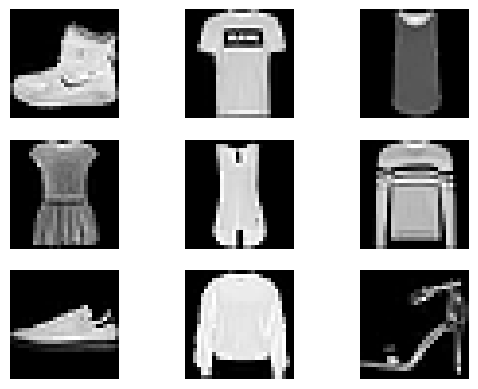

In [ ]:
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(3, 3, i+1)

    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')

plt.show()

3. **레이블이 어떻게 구성되어 있는 지 확인해봅니다.**

    데이터의 레이블 구성 형태를 살펴봅니다.<br/>
    처음보는 데이터의 경우 데이터 자체를 디스플레이 하여 보면 도움이 됩니다.

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

4. **이제 본격적으로 신경망 모델을 구축해보겠습니다.**

> ❗️ ***아래 코드에서 출력층의 노드 수는 몇 개인지, 출력층의 활성화 함수는 무엇인지, 손실 함수는 어떻게 지정하였는지에 주목해봅시다.***<br/>
❗️ ***`.summary()`를 활용하면 모델의 구조를 빠르게 파악해 볼 수 있습니다.***

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> ❗️ ***위 모델의 파라미터 수는 총 7,850개입니다. 왜 7,850개가 될 지에 대해 생각해봅시다.***

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.5980 - accuracy: 0.7984
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4619 - accuracy: 0.8429
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4352 - accuracy: 0.8504
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4235 - accuracy: 0.8543
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4135 - accuracy: 0.8572
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4074 - accuracy: 0.8583
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4027 - accuracy: 0.8591
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3976 - accuracy: 0.8620
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3944 - accuracy: 0.8632
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.392

5. **학습한 신경망 모델을 사용하여 평가합니다.**

In [ ]:
model.evaluate(X_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.4527 - accuracy: 0.8429 - 659ms/epoch - 2ms/step


[0.45274117588996887, 0.8428999781608582]

### 추가 고려 사항

- **학습률(Learning rate)**

    **<font color="ff6f61">학습률(Learning rate, `lr`)</font>**이란 매 가중치에 대해 구해진 기울기 값을 얼마나 경사 하강법에 적용할 지를 결정하는 하이퍼파라미터입니다.  
    지난 시간에 보았던 경사 하강법 수식에서 학습률이 어디에 위치하는지 확인해봅시다.

<img src="https://i.imgur.com/ic91umJ.png" height="200"/>

위 식에서 볼 수 있는 것처럼 해당 지점에서의 기울기를 구하여 기울기가 감소하는$(-)$ 방향으로 이동하게 되는데요.<br/>
학습률은 **얼마나 이동할 지를 조정하는 하이퍼파라미터**입니다.

경사 하강법이 산길을 내려가는 과정이라면 학습률은 **보폭을 결정**하게 됩니다.<br/>
학습률이 크면 보폭이 크니 Iteration 마다 성큼성큼 이동하고, 작으면 보폭이 작아 조금씩만 이동하게 됩니다.<br/>
그렇다면 학습률을 잘못 설정하면 어떻게 될까요?

- **학습률이 너무 크거나 작으면 어떻게 될까요?**

> ❗️ *아래는 학습률이 너무 클 때와 작을 때의 경사하강법을 나타낸 그림입니다.*  
> *그림을 기억하면서 최적의 학습률이 왜 중요한 지에 대해 생각해봅시다.*

<img src="https://i.imgur.com/RfBFgKs.png" height="300">

그림에서 확인할 수 있는 것처럼<br/>
**학습률이 너무 낮으면 최적점에 이르기까지 너무 오래 걸리거나, 주어진 Iteration 내에서 최적점에 도달하는 데 실패**하기도 합니다.<br/>
반대로 **너무 높으면 경사 하강 과정에서 발산하면서 모델이 최적값을 찾을 수 없게** 되어버립니다.

그렇기 때문에 최적의 학습률을 찾는 것은 학습에서 중요한 요소인데요.<br/>
위와 같은 문제를 해결하기 위해서 사용되는 방법이 **학습률 감소/계획법**입니다.


##### 1) **학습률 감소(Learning rate Decay)**

학습률 감소는 Adagrad, RMSprop, Adam 과 같은 주요 옵티마이저에 이미 구현되어 있기 때문에 쉽게 적용할 수 있습니다.  
해당 옵티마티저의 하이퍼파라미터를 조정하면 감소 정도를 변화시킬 수 있습니다.

아래와 같이 **`.compile`** 내에 있는 **`optimizer=`** 에 Adam 등의 옵티마이저 적용 후 내부 하이퍼파라미터를 변경하면 학습률 감소를 적용할 수 있습니다.

In [ ]:
# optimizer 내 lr(learning rate) 인자를 통해 학습률을 설정할 수 있습니다. beta_1 인자는 학습률 감소율을 설정하며 Adam 내 수식의 변수를 그대로 사용합니다.

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1 = 0.89)
             , loss='sparse_categorical_crossentropy'
             , metrics=['accuracy'])

 * Dropout (드롭아웃)

**Dropout(드롭아웃)**은 Iteration 마다 **레이어 노드 중 일부를 사용하지 않으면서 학습을 진행하는 방법**입니다.<br/>
매 번 다른 노드가 학습되면서 전체 가중치가 과적합되는 것을 방지할 수 있습니다.<br/>
아래는 Dropout을 적용했을 때의 신경망에서 학습되는 노드를 나타낸 그림입니다.

<img src="https://i.imgur.com/rAyIZxV.png" height="300">

Dropout 을 적용할 때에는 0~1 사이의 실수를 입력하게 되는데요.<br/>
모델 내에 있는 특정 레이어의 노드 연결을 지정해 준 비율만큼 강제로 끊습니다.<br/>
매 Iteration 마다 랜덤하게 노드를 차단하여 다른 가중치를 학습하도록 조정하기 때문에 과적합을 방지할 수 있게 됩니다.

Keras 에서는 아래와 같이 Dropout 을 적용하고 싶은 층 다음에 `Dropout` 함수를 추가하면 됩니다.

In [ ]:
# from tensorflow.keras import regularizers
# from tensorflow.keras.layers import Dropout

# Dense(64,
#       kernel_regularizer=regularizers.l2(0.01),
#       activity_regularizer=regularizers.l1(0.01))
# Dropout(0.5)

### Fashion MNIST 신경망 예제에 기법 적용하기

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import regularizers

import os
import numpy as np
import tensorflow as tf
import keras

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

1) **데이터셋을 불러옵니다.**

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


2) **데이터를 정규화(Normalization)합니다.**

In [ ]:
X_train = X_train / 255.
X_test = X_test / 255.

3) **레이블의 개수와 형태를 확인합니다.**

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

4) **신경망 모델을 구축하고 Compile 합니다.**

  구축 과정에서 위에서 학습하였던 **Weight Decay(가중치 감소), Dropout(드롭아웃)**을 적용해봅시다.

In [ ]:
# 기본적인 신경망을 만드는 코드
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64,
          kernel_regularizer=regularizers.l2(0.01),
          activity_regularizer=regularizers.l1(0.01)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

Compile 설정에서 위에서 학습하였던 **Learning rate Decay(학습률 감소)**를 적용해봅니다.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1 = 0.89)
             , loss='sparse_categorical_crossentropy'
             , metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


5) **신경망 모델을 학습합니다.**

먼저 학습 과정에서 **Early Stopping(조기 종료)**를 적용할 수 있도록<br/>
파라미터 저장 경로와 조기 종료 옵션을 설정하여 줍니다.

In [ ]:
# 파라미터 저장 경로를 설정하는 코드입니다.

checkpoint_filepath = "FMbest.hdf5" # .hdf5는 데이터를 저장하는 확장자입니다. 'FMbest.hdf5' 파일로 최고 성능의 모델을 저장하며 .h5와 동일한 확장자입니다.

# moitor : 개선을 확인할 지표
# min_delta : 개선이 있다고 판단되는 최소 변경값. min_delta보다 변경 사항이 작다면 개선이 없다고 판단(default=0)
# patience : 개선이 없을 경우 개선되기까지 기다리는 epochs의 수
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

In [ ]:
# ModelCheckpoint를 통해 모델을 저장합니다.

# filepath : 파일이 저장될 경로. 앞서 설정한 것처럼 'FMbest.hdf5'에 저장됩니다.
# save_best_only : 최고 성능을 보이는 경우만 저장합니다. False일 경우 filepath에 모든 학습 과정이 저장됩니다.
# save_weights_only : 모델의 가중치만 저장합니다. False일 경우 레이어까지 모두 저장합니다.
# mode : 검증 지표가 val_acc(정확도)일 경우 높을 수록 좋기 때문에 'max'로 설정, val_loss일 경우 낮을 수록 좋기 때문에 'min'으로 설정, 'auto'의 경우 자동으로 탐지하여 진행함.
# save_freq : 매 에폭마다 저장을 시도합니다. integer로 설정할 경우 설정한 수만큼의 iteration마다 모델을 저장합니다.
save_best = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=True, mode='auto', save_freq='epoch', options=None)

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=30, verbose=1,
          validation_data=(X_test,y_test), # 검증 데이터
          callbacks=[early_stop, save_best]) # 앞서 선언한 Early Stopping과 Model Checkpoint를 callbacks를 통해 설정합니다.

Epoch 1/30
1872/1875 [============================>.] - ETA: 0s - loss: 1.2253 - accuracy: 0.7691
Epoch 1: val_loss improved from inf to 0.88819, saving model to FMbest.hdf5
1875/1875 [==============================] - 11s 4ms/step - loss: 1.2247 - accuracy: 0.7692 - val_loss: 0.8882 - val_accuracy: 0.7978
Epoch 2/30
1872/1875 [============================>.] - ETA: 0s - loss: 0.9276 - accuracy: 0.7906
Epoch 2: val_loss did not improve from 0.88819
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9278 - accuracy: 0.7905 - val_loss: 0.9174 - val_accuracy: 0.7915
Epoch 3/30
1868/1875 [============================>.] - ETA: 0s - loss: 0.9087 - accuracy: 0.7899
Epoch 3: val_loss did not improve from 0.88819
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9096 - accuracy: 0.7897 - val_loss: 0.9150 - val_accuracy: 0.7870
Epoch 4/30
1867/1875 [============================>.] - ETA: 0s - loss: 0.9001 - accuracy: 0.7929
Epoch 4: val_loss improved from 0.8881

6) **조기종료 직전의 모델을 사용하여 평가를 진행합니다.**

In [ ]:
model.predict(X_test[0:1])

1/1 [==============================] - 0s 155ms/step


array([[4.2094078e-05, 2.8737684e-05, 1.1058110e-04, 1.2665593e-04,
        1.2302694e-04, 8.6323008e-02, 1.4196172e-04, 1.7086932e-01,
        1.1637054e-02, 7.3059756e-01]], dtype=float32)

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.7972 - accuracy: 0.8203 - 782ms/epoch - 2ms/step


7) **콜백(Callback)에 의해 Best 모델의 파라미터가 제대로 저장되었는지 확인하고 해당 모델로 평가를 진행합니다.**

In [ ]:
!ls # 현제 경로를 확인

FMbest.hdf5  sample_data


저장된 경로로부터 모델의 파라미터(가중치)를 불러옵니다.

In [ ]:
model.load_weights(checkpoint_filepath) # 'FMbest.hdf5'에 저장한 가중치를 불러옵니다.

불러온 모델을 사용하여 평가를 수행합니다.

In [ ]:
model.predict(X_test[0:1]) # 테스트 실행

1/1 [==============================] - 0s 32ms/step


array([[2.7424971e-05, 3.4651355e-05, 4.9306887e-05, 1.1625543e-04,
        5.8693986e-05, 1.2935276e-01, 6.6680535e-05, 1.9742100e-01,
        1.4727977e-03, 6.7140043e-01]], dtype=float32)

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1) # 테스트 지표 확인

313/313 [==============================] - 1s 3ms/step - loss: 0.7839 - accuracy: 0.8217
